<a href="https://colab.research.google.com/github/qyune/Random-Forest-For-Imbalanced-Dataset/blob/main/RF_EK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
# df = pd.read_csv('down_ins_data.csv')
# print(df.head(5))
# print(df['Response'].value_counts())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter
from matplotlib import pyplot
from sklearn.metrics import roc_curve, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

**The following command install the imbalanced-learn the latest version**

In [ ]:
#!pip install -U imbalanced-learn

**2. Data preprocessing** 
We directly load the dataset from the internet.
After that, we transform categorical values to numerical values. We decided
to make the dataset more imbalanced for the sake of showing different methods
to handle extremely imbalanced datasets with Random Forest.

In [ ]:
aug_train_url = 'https://raw.githubusercontent.com/qyune/Random-Forest-For-Imbalanced-Dataset/main/aug_train.csv'
df = pd.read_csv(aug_train_url)
cleanup = {'Gender': {'Male': 1, 'Female': 0},
       'Vehicle_Damage': {'Yes': 1, 'No': 0},
       'Vehicle_Age':{'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}}
df = df.replace(cleanup)
df = df.drop('id', axis=1)
print(df.head(5))
print(df['Response'].value_counts())
# form groups by 'Response' class
grouped = df.groupby('Response')
# spilt data by 'Response' label
min_df = grouped.get_group(1)
maj_df = grouped.get_group(0)
# randomly select of 'Response' class
maj_df = maj_df.sample(frac=.2, random_state=2)
min_df = min_df.sample(frac=.1, random_state=2)
# combine two dataframe
frames = [maj_df, min_df]
df = pd.concat(frames)
# randomize the order
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(5))
print(df['Response'].value_counts())
#df.to_csv('down_ins_data.csv', index=False)
#spilt data to train and test sets
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values
print(X)
print(y)

   Gender  Age  Driving_License  ...  Policy_Sales_Channel  Vintage  Response
0       1   22                1  ...                 152.0       16         0
1       1   42                1  ...                  26.0      135         0
2       0   66                1  ...                 124.0      253         0
3       0   22                1  ...                 152.0       69         0
4       1   28                1  ...                 152.0      211         0

[5 rows x 11 columns]
0    319553
1     62601
Name: Response, dtype: int64
   Gender  Age  Driving_License  ...  Policy_Sales_Channel  Vintage  Response
0       1   43                1  ...                   8.0      250         0
1       1   62                1  ...                 124.0      108         0
2       1   23                1  ...                 124.0      121         1
3       1   35                1  ...                 152.0      209         0
4       1   41                1  ...                 124.0      18

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
# train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
# test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
# print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=57519, 1=5634, Test: 0=6392, 1=626


In [ ]:
model = RandomForestClassifier(n_estimators=1, random_state=0)

y_pred = model.predict(X_test)
print(y_pred)
fig = plot_confusion_matrix(Smote_RFC, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()
print(confusion_matrix(y_test, y_pred))
# predict probabilities
target_names = ['Will Not Buy', 'Will Buy']
print(classification_report(y_test, y_pred, target_names=target_names))

In [ ]:
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
train_0, train_1 = len( over_y_train[ over_y_train==0]), len( over_y_train[ over_y_train==1])
test_0, test_1 = len(over_y_test[over_y_test==0]), len(over_y_test[over_y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 63911, 1: 6260})
>Train: 0=57519, 1=57520, Test: 0=6392, 1=6391


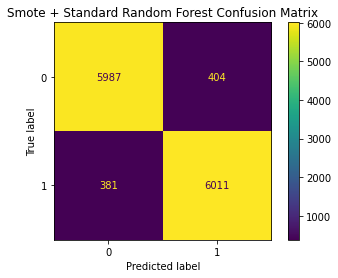

              precision    recall  f1-score   support

Will Not Buy       0.94      0.94      0.94      6391
    Will Buy       0.94      0.94      0.94      6392

    accuracy                           0.94     12783
   macro avg       0.94      0.94      0.94     12783
weighted avg       0.94      0.94      0.94     12783



In [ ]:
Smote_RFC = RandomForestClassifier(n_estimators=150, random_state=0)
Smote_RFC.fit(over_X_train, over_y_train)
y_pred = Smote_RFC.predict(over_X_test)
fig = plot_confusion_matrix(Smote_RFC, over_X_test, over_y_test)
plt.title('Smote + Standard Random Forest Confusion Matrix')
plt.show()
#print(confusion_matrix(over_y_test, y_pred))
# predict probabilities
target_names = ['Will Not Buy', 'Will Buy']
print(classification_report(over_y_test, y_pred, target_names=target_names))

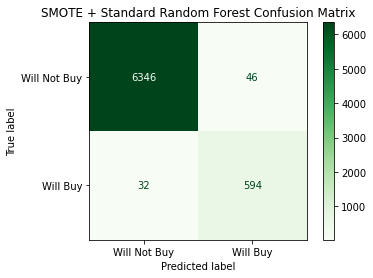

[[6346   46]
 [  32  594]]
              precision    recall  f1-score   support

Will Not Buy       0.99      0.99      0.99      6392
    Will Buy       0.93      0.95      0.94       626

    accuracy                           0.99      7018
   macro avg       0.96      0.97      0.97      7018
weighted avg       0.99      0.99      0.99      7018



In [ ]:
y_pred = Smote_RFC.predict(X_test)
fig = plot_confusion_matrix(Smote_RFC, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()
print(confusion_matrix(y_test, y_pred))
# predict probabilities
target_names = ['Will Not Buy', 'Will Buy']
print(classification_report(y_test, y_pred, target_names=target_names))

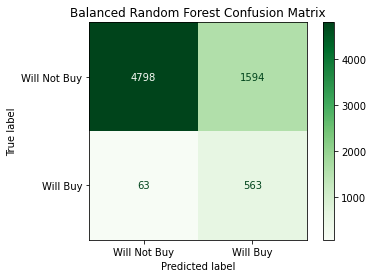

              precision    recall  f1-score   support

Will Not Buy       0.99      0.75      0.85      6392
    Will Buy       0.26      0.90      0.40       626

    accuracy                           0.76      7018
   macro avg       0.62      0.82      0.63      7018
weighted avg       0.92      0.76      0.81      7018



In [ ]:
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
BRFC.fit(X_train, y_train)
y_pred = BRFC.predict(X_test)
fig = plot_confusion_matrix(BRFC, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()
#print(confusion_matrix(y_test, y_pred))
# # predict probabilities
# yhat = BRFC.predict_proba(X_test)
# # retrieve just the probabilities for the positive class
# pos_probs = yhat[:, 1]
# # calculate roc curve for model
# fpr1, tpr1, _ = roc_curve(y_test, pos_probs)
# # plot model roc curve
# #pyplot.plot(fpr1, tpr1, marker='.', label='BRFC', color='blue')
# #color='orange',
target_names = ['Will Not Buy', 'Will Buy']
print(classification_report(y_test, y_pred, target_names=target_names))

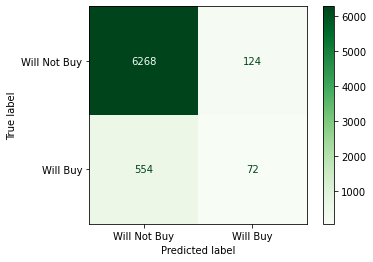

[[6268  124]
 [ 554   72]]
              precision    recall  f1-score   support

Will Not Buy       0.92      0.98      0.95      6392
    Will Buy       0.37      0.12      0.18       626

    accuracy                           0.90      7018
   macro avg       0.64      0.55      0.56      7018
weighted avg       0.87      0.90      0.88      7018



In [ ]:
#training
model = RandomForestClassifier(n_estimators=150, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fig = plot_confusion_matrix(model, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()
print(confusion_matrix(y_test, y_pred))
target_names = ['Will Not Buy', 'Will Buy']
print(classification_report(y_test, y_pred, target_names=target_names))

**Precision-Recall**

Standard RF: f1=0.175 auc=0.307
Balanced RF: f1=0.405 auc=0.317
SMOTE Standard RF: f1=0.938 auc=0.978


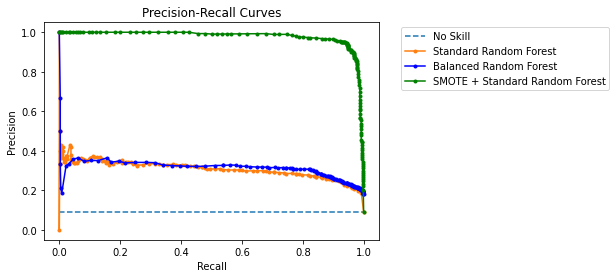

In [ ]:
# precision-recall curve and f1
# fit a model
# X_train, X_test, y_train, y_test
# predict probabilities
lr_probs = model.predict_proba(X_test)
lr_probs_b = BRFC.predict_proba(X_test)
lr_probs_c = Smote_RFC.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_b = lr_probs_b[:, 1]
lr_probs_c = lr_probs_c[:, 1]
# predict class values
yhat = model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
#BRFC
yhat_b = BRFC.predict(X_test)
lr_precision_b, lr_recall_b, _ = precision_recall_curve(y_test, lr_probs_b)
lr_f1_b, lr_auc_b = f1_score(y_test, yhat_b), auc(lr_recall_b, lr_precision_b)
#SMOTE_RF
yhat_c = Smote_RFC.predict(X_test)
lr_precision_c, lr_recall_c, _ = precision_recall_curve(y_test, lr_probs_c)
lr_f1_c, lr_auc_c = f1_score(y_test, yhat_c), auc(lr_recall_c, lr_precision_c)
# summarize scores
print('Standard RF: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Balanced RF: f1=%.3f auc=%.3f' % (lr_f1_b, lr_auc_b))
print('SMOTE Standard RF: f1=%.3f auc=%.3f' % (lr_f1_c, lr_auc_c))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Standard Random Forest')
pyplot.plot(lr_recall_b, lr_precision_b, marker='.', label='Balanced Random Forest', color='blue')
pyplot.plot(lr_recall_c, lr_precision_c, marker='.', label='SMOTE + Standard Random Forest', color='green')
# title
pyplot.title("Precision-Recall Curves") 
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
#pyplot.legend()
pyplot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show the plot
pyplot.show()

# Standard Random Forest

In [ ]:
# rf = RandomForestClassifier()
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# parameters = {'n_estimators': [100, 200]}
# gcv = GridSearchCV(estimator=rf, param_grid=parameters, scoring='roc_auc', cv=cv, n_jobs=-1)
# print("GCV_ROC_AUC: {}".format(gcv.score(X, y)))

In [ ]:
%%time
#training
classifier = RandomForestClassifier(n_estimators=150, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# enumerate the splits and summarize the distributions
# for train_ix, test_ix in cv.split(X, y):
# 	# select rows
# 	train_X, test_X = X[train_ix], X[test_ix]
# 	train_y, test_y = y[train_ix], y[test_ix]
# 	# summarize train and test composition
# 	train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
# 	test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
# 	print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
# cross validation to evaluate model
scoring = ('f1', 'recall', 'precision', 'roc_auc')
scores = cross_validate(classifier, X, y, scoring=scoring, cv=cv)
# summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))
# Mean ROC AUC: 0.888
# Mean f1: 0.407
# Mean recall: 0.914
# Mean precision: 0.262
# Mean accuracy: 0.762
# CPU times: user 2min 41s, sys: 8.08 s, total: 2min 49s
# Wall time: 2min 50s

# Mean ROC AUC: 0.877
# Mean f1: 0.154
# Mean recall: 0.098
# Mean precision: 0.359
# Mean accuracy: 0.904
# CPU times: user 4min 42s, sys: 965 ms, total: 4min 43s
# Wall time: 4min 43s

Mean f1: 0.160
Mean recall: 0.102
Mean precision: 0.365
CPU times: user 5min 7s, sys: 912 ms, total: 5min 8s
Wall time: 5min 9s


# Make sure you are using imblearn v0.7.0

In [ ]:
# import imblearn
# print(imblearn.__version__)

0.7.0


## Random Forest With Random Undersampling

In [ ]:
%%time
#required imblearn v0.7.0 and scikit-learn v0.22.1
from imblearn.ensemble import BalancedRandomForestClassifier
#print(Counter(y))


classifier = BalancedRandomForestClassifier(n_estimators=150)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# cross validation to evaluate model
scoring = ('f1', 'recall', 'precision', 'roc_auc')
scores = cross_validate(classifier, X, y, scoring=scoring, cv=cv)
# summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores['test_roc_auc']))
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.406
Mean recall: 0.913
Mean precision: 0.261
CPU times: user 2min 53s, sys: 10.4 s, total: 3min 3s
Wall time: 3min 3s


## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
Over_X, Over_y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)
classifier = RandomForestClassifier(n_estimators=150, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
scores = cross_validate(classifier, Over_X, Over_y, scoring=scoring, cv=cv)
# summarize performance
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Counter({0: 63911, 1: 63911})
Mean f1: 0.939
Mean recall: 0.939
Mean precision: 0.939
